# Auto-encodeurs débruiteurs avec Keras

## Vérification de l'utilisation de GPU

Allez dans le menu `Exécution > Modifier le type d'execution` et vérifiez que l'on est bien en Python 3 et que l'accélérateur matériel est configuré sur « GPU ».

In [1]:
!nvidia-smi

Tue Feb 27 13:40:20 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.33                 Driver Version: 546.33       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1660 Ti   WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   52C    P0              22W /  80W |    634MiB /  6144MiB |      2%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Import de TensorFlow et des autres librairies nécessaires

In [5]:
import matplotlib.pyplot as plt
import numpy
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers

## Chargement de MNIST

Nous allons utiliser un prétraîtement légèrement différent des autres fois : étant donné que nous voulons pouvoir prédire les valeurs données en entrée en sortie (principe de l'auto-encodage), nous allons simplement projeter ces valeurs dans $[0, 1]$ au lieu de $[0, 255]$. Notez qu'habituellement nous ne faisons pas ça : nous normalisons en centrant sur zéro et en divisant par l'écart-type.

In [6]:
(X_train, _), (X_test, y_test) = keras.datasets.mnist.load_data()
nb_classes = 10
input_dim = 28 * 28
X_train = X_train.reshape(-1, input_dim).astype('float32')
X_test = X_test.reshape(-1, input_dim).astype('float32')

# On utilise cette normalisation pour garder les pixel à 0 où ils sont
X_train = X_train / 255.0
X_test = X_test / 255.0

## Application d'un bruit  gaussien

In [7]:
noise_factor = 0.3
X_train_noisy = X_train + numpy.random.normal(0, noise_factor, X_train.shape) 
X_test_noisy = X_test + numpy.random.normal(0, noise_factor, X_test.shape)

# On clip les valeurs pour éviter les pixels plus blanc que blanc (ou plus noir
# que noir) 
numpy.clip(X_train_noisy, 0, 1, out=X_train_noisy)
numpy.clip(X_test_noisy, 0, 1, out=X_test_noisy)

array([[0.39219707, 0.        , 0.        , ..., 0.69597158, 0.        ,
        0.        ],
       [0.1462987 , 0.40679245, 0.34637879, ..., 0.        , 0.        ,
        0.45286797],
       [0.        , 0.06146805, 0.46106345, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.26466992, 0.        , ..., 0.        , 0.42386024,
        0.        ],
       [0.04517892, 0.14837987, 0.42605795, ..., 0.        , 0.04575818,
        0.        ],
       [0.4126223 , 0.50394729, 0.        , ..., 0.31755829, 0.58347055,
        0.        ]])

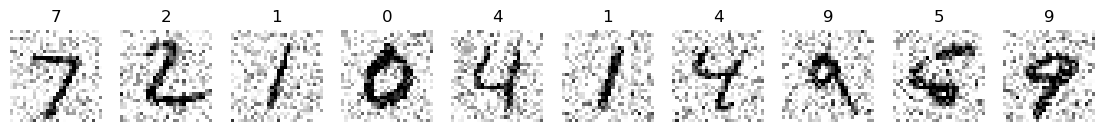

In [11]:
n = 10
f, ax = plt.subplots(1, n, figsize=(n * 1.4, 2))
for i in range(n):
    ax[i].imshow(X_test_noisy[i].reshape(28, 28), cmap="gray_r")
    ax[i].set_title(y_test[i])
    ax[i].axis("off")
plt.show()

## Création de l'autoencodeur débruiteur



In [23]:
# Votre code ici
encoding_dim = 4

encoder = keras.Sequential([
    layers.Dense(16,activation=keras.activations.relu),
    layers.Dense(32,activation=keras.activations.relu),
    layers.Dense(16,activation=keras.activations.relu),
    layers.Dense(encoding_dim,activation=keras.activations.sigmoid)
])

decoder = keras.Sequential([
    layers.Dense(16,activation=keras.activations.relu),
    layers.Dense(32,activation=keras.activations.relu),
    layers.Dense(16,activation=keras.activations.relu),
    layers.Dense(input_dim,activation=keras.activations.sigmoid)    
    ])

autoencoder = keras.Sequential([encoder, decoder])

autoencoder.compile(optimizer="adam", loss=keras.losses.binary_crossentropy)

autoencoder.build(input_shape=(None, input_dim))

## Apprentissage

*Écrivez la ligne correspondant à l'apprentissage de votre autoencodeur :*

- *50 itérations devraient suffire*
- *Utilisez un batch de 256*

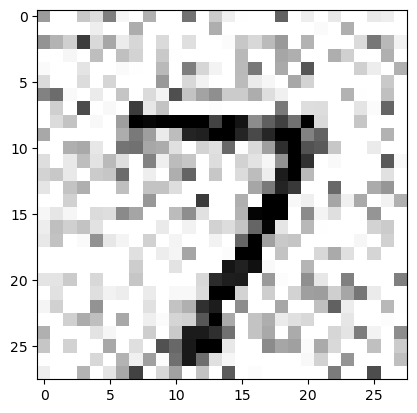

In [20]:
plt.imshow(X_test_noisy[0].reshape(28, 28), cmap="gray_r")

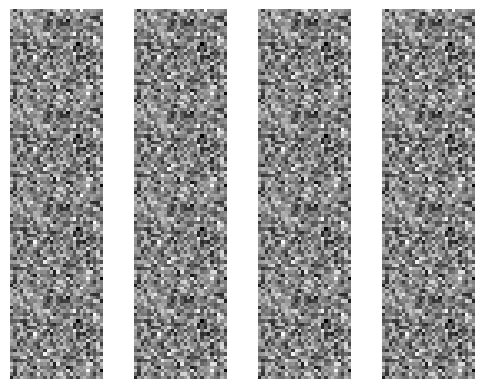

----------- EPOCH 0 -----------
235/235 [==============================] - 2s 5ms/step - loss: 0.3624


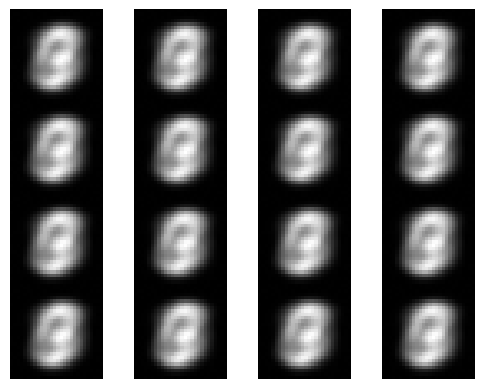

----------- EPOCH 1 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.2633


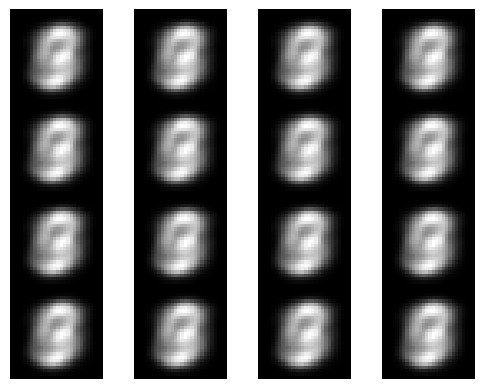

----------- EPOCH 2 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.2631


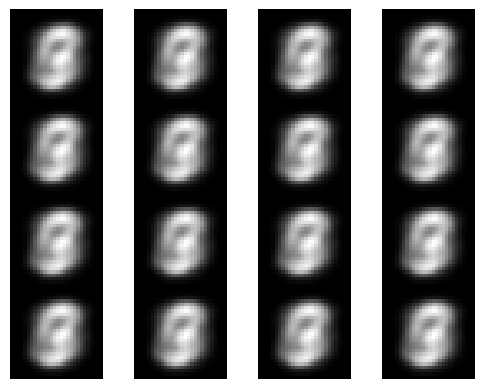

----------- EPOCH 3 -----------
235/235 [==============================] - 1s 4ms/step - loss: 0.2630


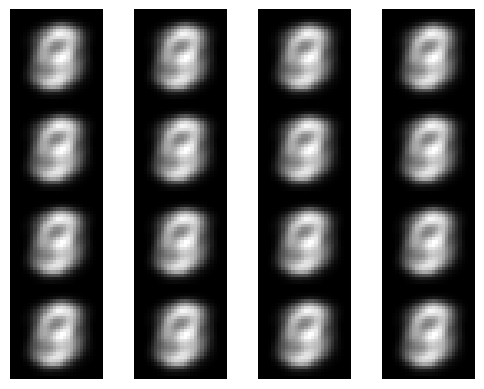

----------- EPOCH 4 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.2630


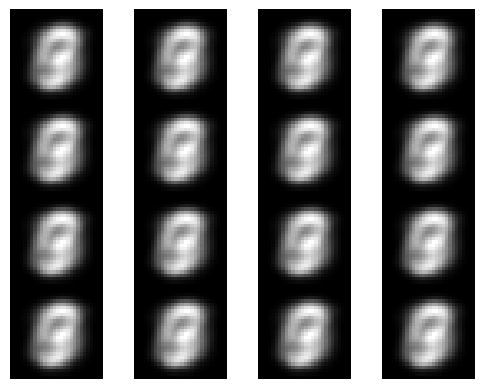

----------- EPOCH 5 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.2630


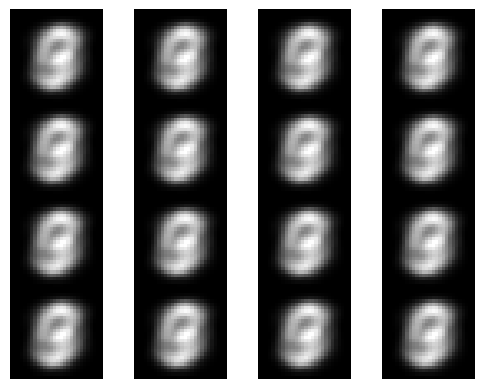

----------- EPOCH 6 -----------
235/235 [==============================] - 1s 4ms/step - loss: 0.2630


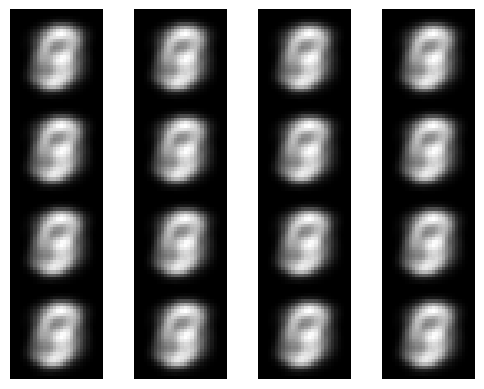

----------- EPOCH 7 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.2629


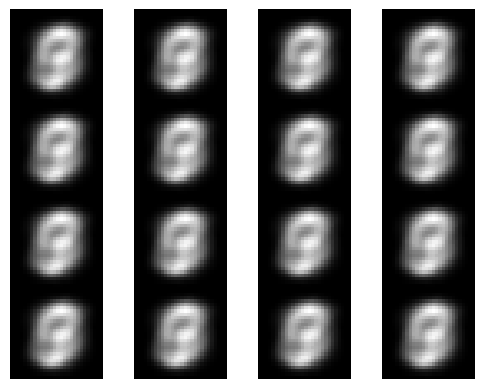

----------- EPOCH 8 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.2629


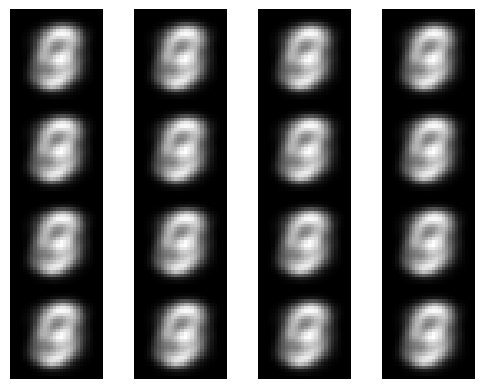

----------- EPOCH 9 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.2629


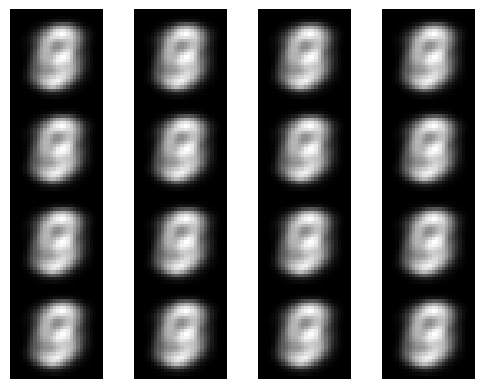

----------- EPOCH 10 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.2630


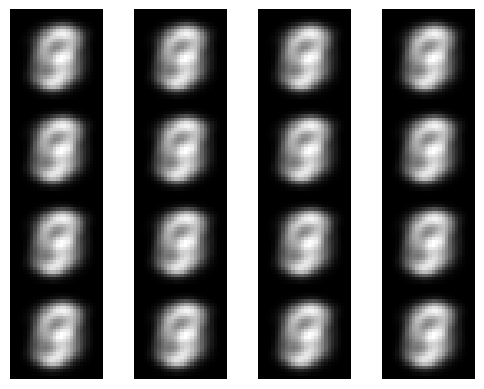

----------- EPOCH 11 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.2629


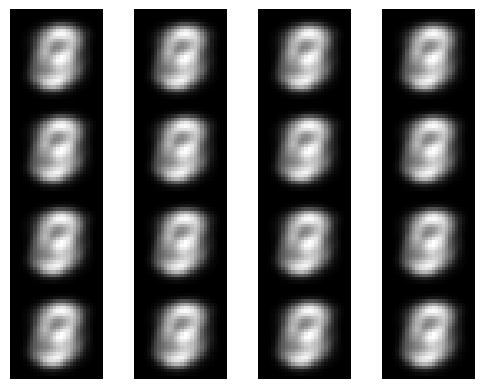

----------- EPOCH 12 -----------
235/235 [==============================] - 1s 4ms/step - loss: 0.2629


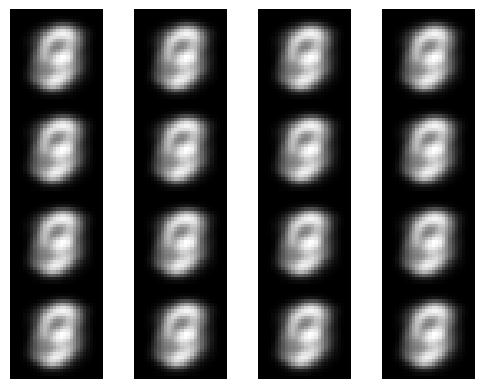

----------- EPOCH 13 -----------
235/235 [==============================] - 1s 4ms/step - loss: 0.2629


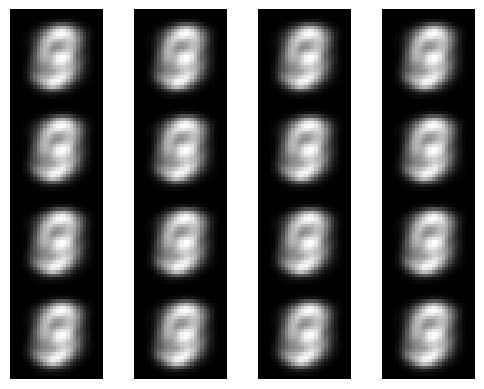

----------- EPOCH 14 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.2629


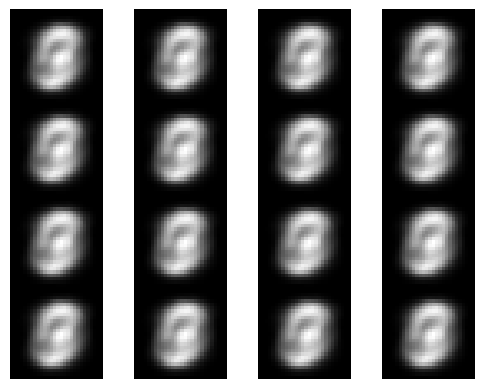

----------- EPOCH 15 -----------
235/235 [==============================] - 1s 4ms/step - loss: 0.2630


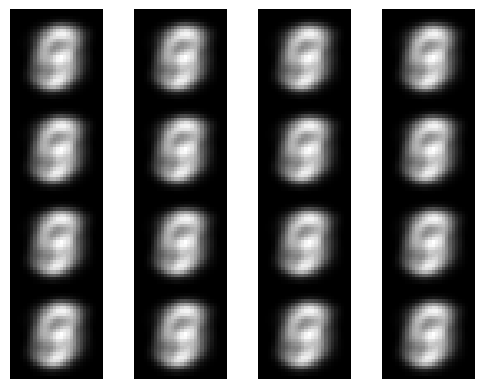

----------- EPOCH 16 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.2629


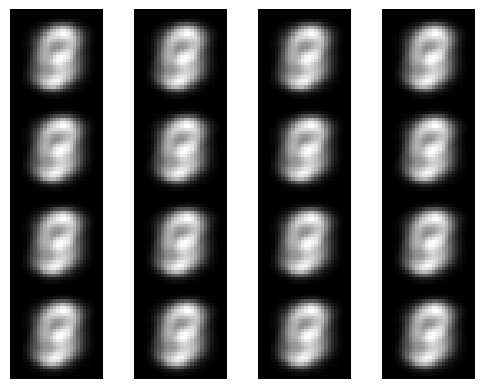

----------- EPOCH 17 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.2629


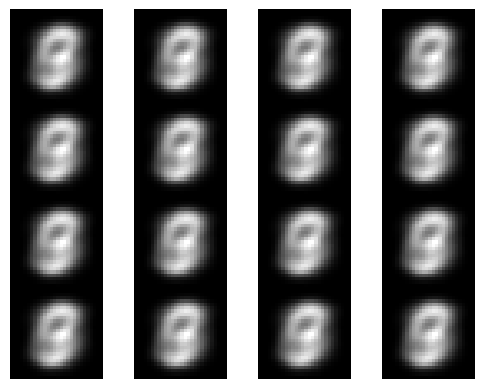

----------- EPOCH 18 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.2629


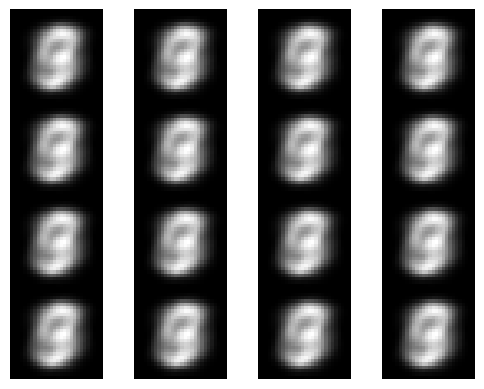

----------- EPOCH 19 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.2629


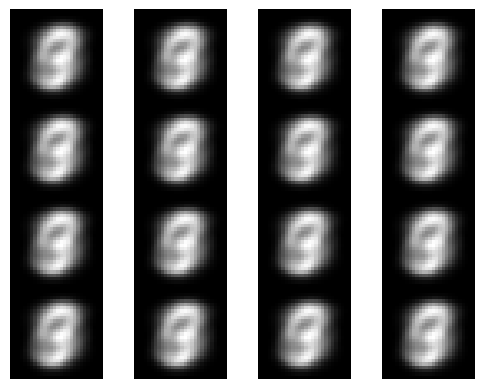

----------- EPOCH 20 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.2629


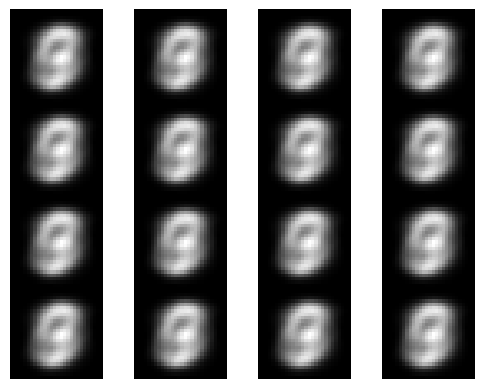

----------- EPOCH 21 -----------
235/235 [==============================] - 1s 4ms/step - loss: 0.2629


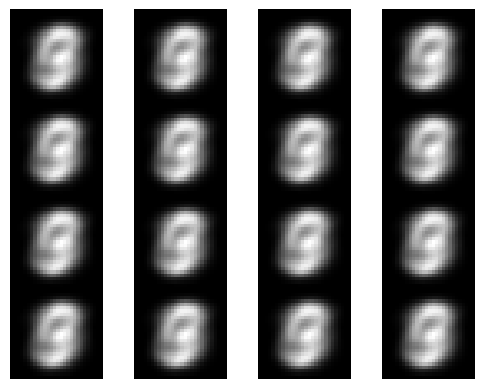

----------- EPOCH 22 -----------
235/235 [==============================] - 1s 4ms/step - loss: 0.2629


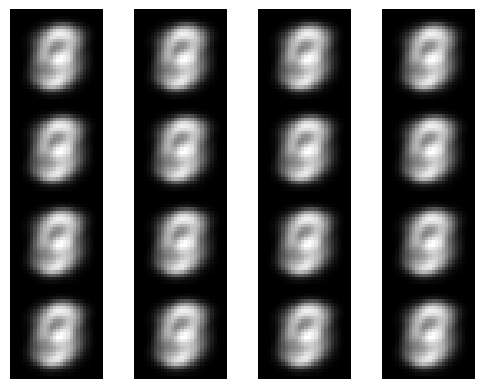

----------- EPOCH 23 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.2629


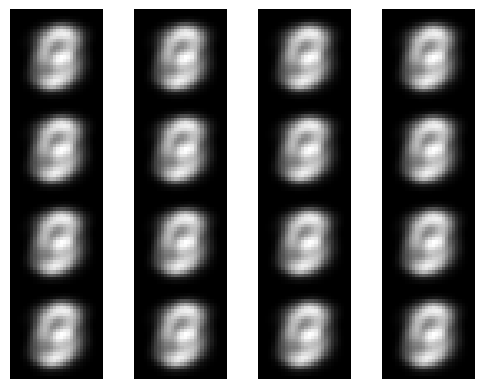

----------- EPOCH 24 -----------
235/235 [==============================] - 1s 4ms/step - loss: 0.2629


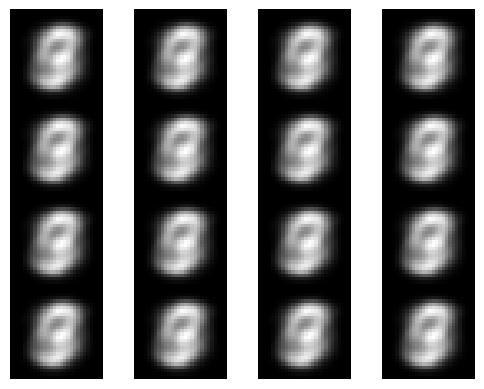

----------- EPOCH 25 -----------
235/235 [==============================] - 1s 4ms/step - loss: 0.2629


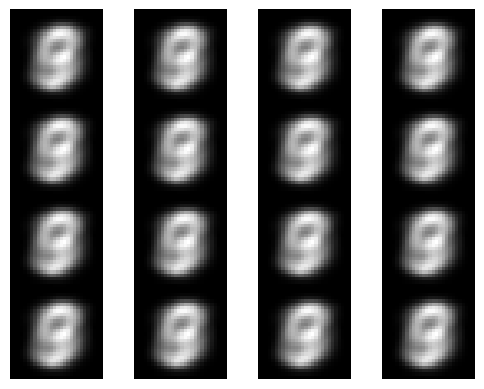

----------- EPOCH 26 -----------
235/235 [==============================] - 1s 4ms/step - loss: 0.2629


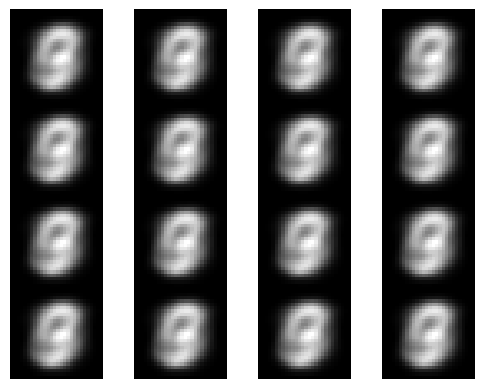

----------- EPOCH 27 -----------
235/235 [==============================] - 1s 4ms/step - loss: 0.2629


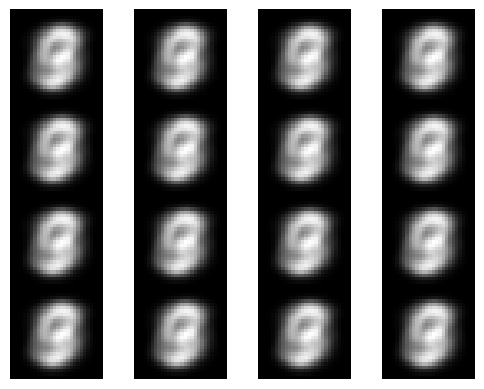

----------- EPOCH 28 -----------
235/235 [==============================] - 1s 4ms/step - loss: 0.2629


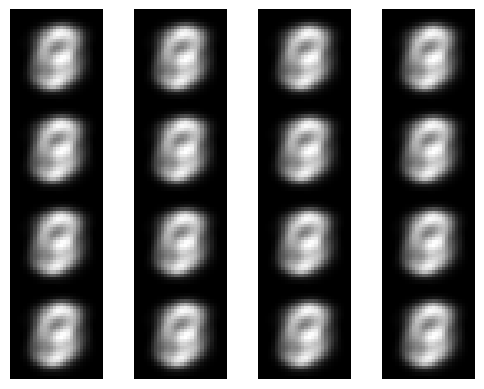

----------- EPOCH 29 -----------
235/235 [==============================] - 1s 4ms/step - loss: 0.2629


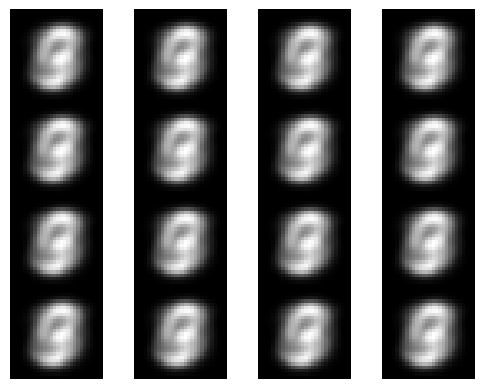

----------- EPOCH 30 -----------
235/235 [==============================] - 1s 4ms/step - loss: 0.2629


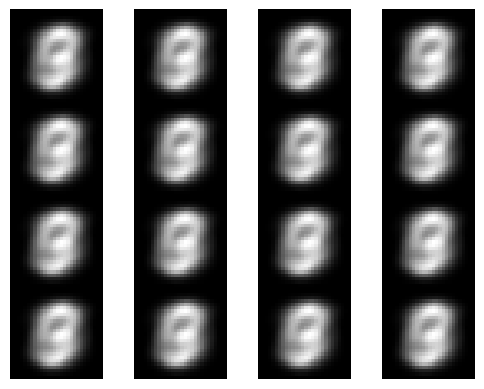

----------- EPOCH 31 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.2629


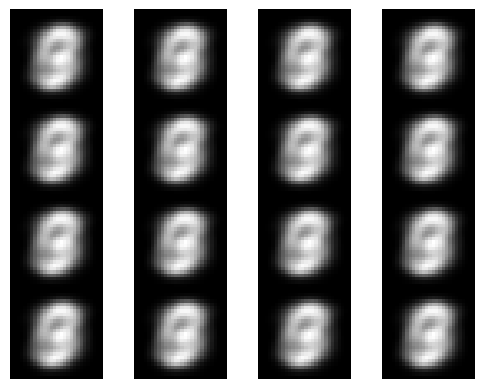

----------- EPOCH 32 -----------
235/235 [==============================] - 1s 4ms/step - loss: 0.2629


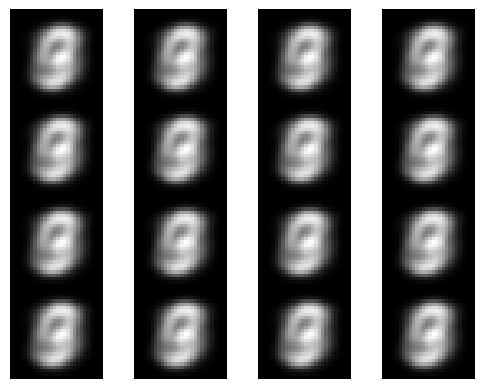

----------- EPOCH 33 -----------
235/235 [==============================] - 1s 4ms/step - loss: 0.2629


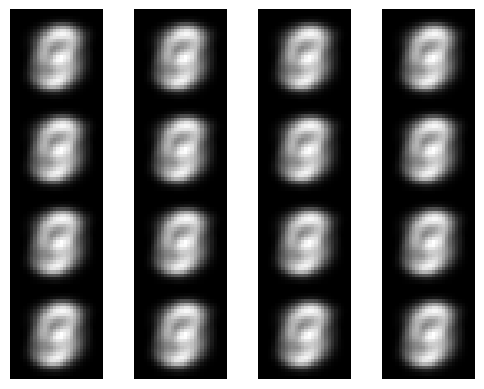

----------- EPOCH 34 -----------
235/235 [==============================] - 1s 4ms/step - loss: 0.2629


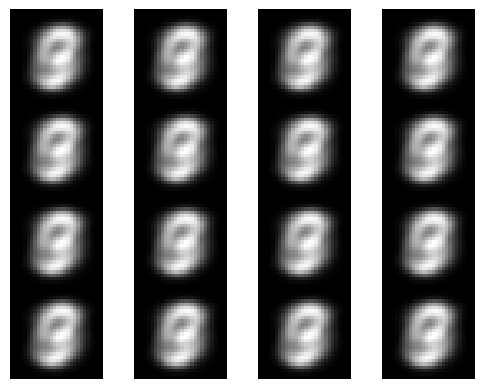

----------- EPOCH 35 -----------
235/235 [==============================] - 1s 4ms/step - loss: 0.2629


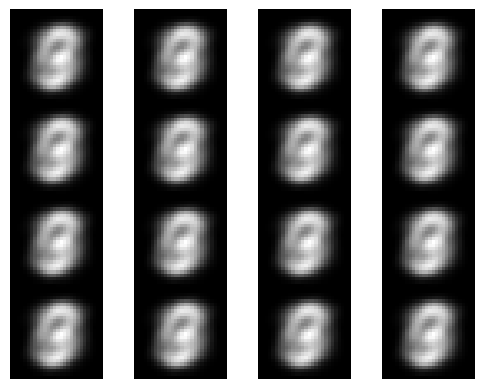

----------- EPOCH 36 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.2629


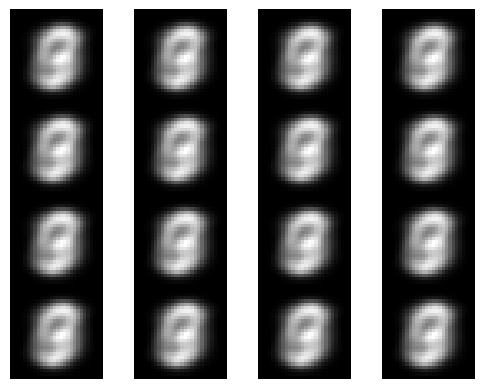

----------- EPOCH 37 -----------
235/235 [==============================] - 1s 4ms/step - loss: 0.2629


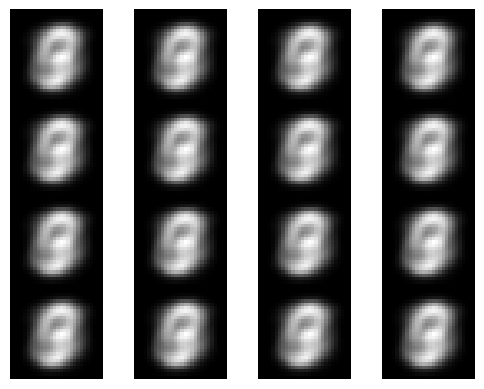

----------- EPOCH 38 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.2629


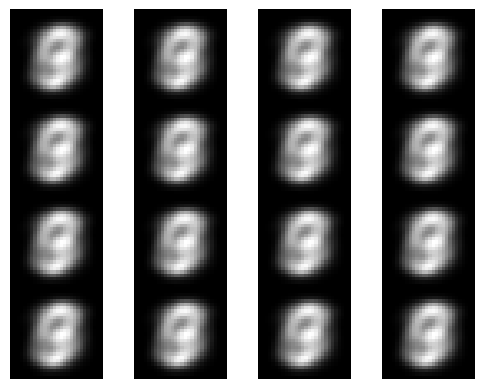

----------- EPOCH 39 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.2629


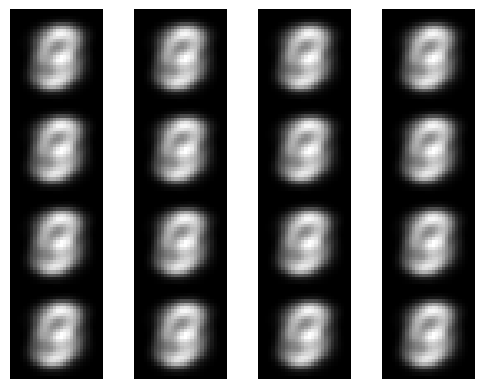

----------- EPOCH 40 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.2629


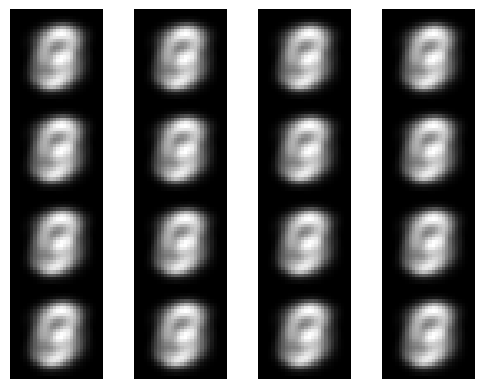

----------- EPOCH 41 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.2629


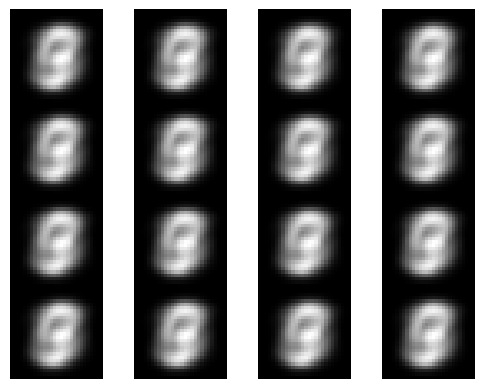

----------- EPOCH 42 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.2629


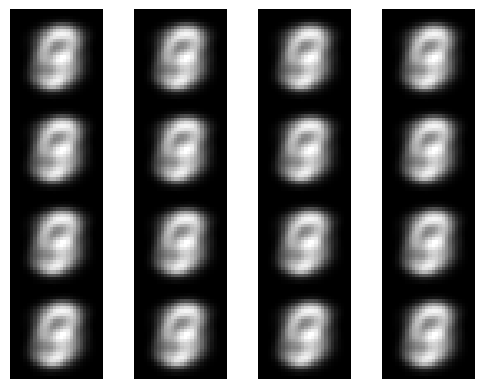

----------- EPOCH 43 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.2629


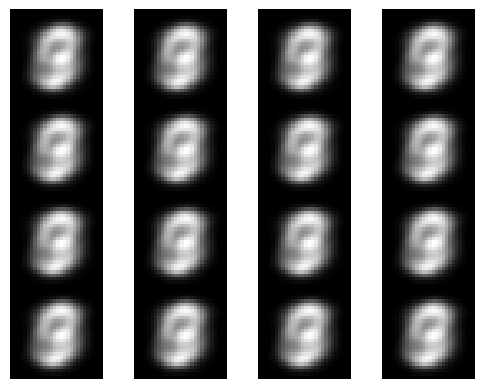

----------- EPOCH 44 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.2629


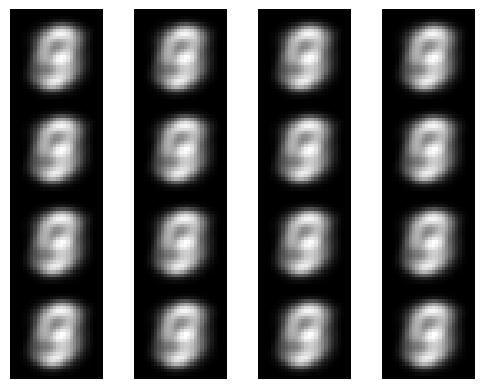

----------- EPOCH 45 -----------
235/235 [==============================] - 1s 4ms/step - loss: 0.2629


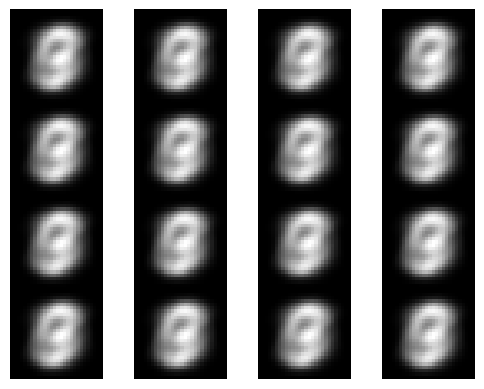

----------- EPOCH 46 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.2629


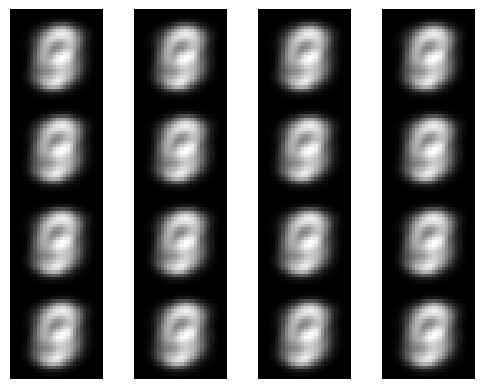

----------- EPOCH 47 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.2629


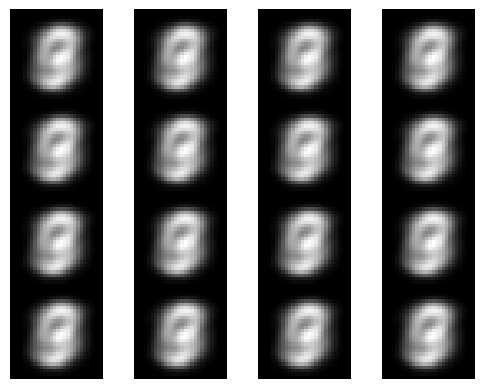

----------- EPOCH 48 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.2629


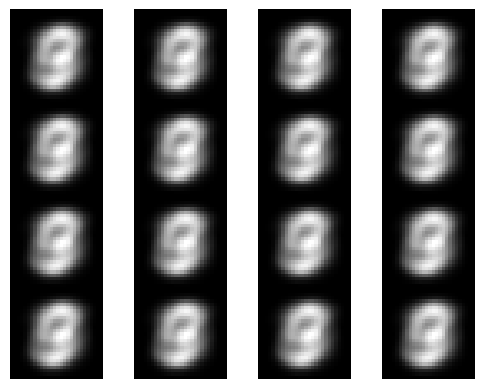

----------- EPOCH 49 -----------
235/235 [==============================] - 1s 4ms/step - loss: 0.2629


In [24]:
# Votre code ici
# Votre code ici
EPOCHS = 50
for epoch in range(EPOCHS):
    fig, axs = plt.subplots(4, 4)
    rand = X_test_noisy[numpy.random.randint(0, 10000, 16)].reshape(4, 4, -1)
    
    
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(autoencoder.predict(rand[i, j].reshape(1,-1)).reshape(28,28), cmap = "gray")
            axs[i, j].axis("off")
    
    plt.subplots_adjust(wspace = 0, hspace = 0)
    plt.show()
    print("-----------", "EPOCH", epoch, "-----------")
    autoencoder.fit(X_train_noisy, X_train,batch_size=256, epochs=1, )

## Base de Test

Autoencodez les images de test et stockez les images obtenues dans la variable `X_test_noisy_pred`

In [25]:
# Votre code ici
X_test_noisy_pred = autoencoder.predict(X_test_noisy)

## Affichage visuel de la performance

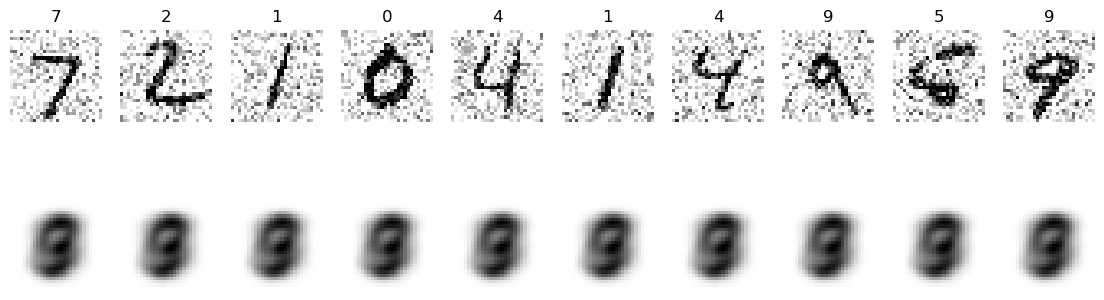

In [26]:
n = 10
_, ax = plt.subplots(2, n, figsize=(n * 1.4, 4))
for i, (ax_top, ax_bottom) in enumerate(ax.T):
    # L'original en haut
    ax_top.imshow(X_test_noisy[i].reshape(28, 28), cmap="gray_r")
    ax_top.set_title(str(y_test[i]))
    ax_top.axis("off")

    # La reconstruction en bas
    ax_bottom.imshow(X_test_noisy_pred[i].reshape(28, 28), cmap="gray_r")
    ax_bottom.axis("off")
plt.show()

## Essayez avec plus de neurones

Que se passe-t-il ?

## Utilisation des réseaux convolutifs

Pour cela il faut remettre chaque image sous forme 28x28x1. Les CNNs ont besoin de cette 3ème dimension de tenseur (il pourrait y avoir plus de canaux que le niveau de gris : il y en a 3 pour les images en couleur et plus encore dans les couches intermédiaires d'un réseau convolutif où le nombre de canaux en entrée d'une couche sera le nombre de kernels de la couche précédente).

In [27]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train_noisy = X_train_noisy.reshape(-1, 28, 28, 1)
X_test_noisy = X_test_noisy.reshape(-1, 28, 28, 1)

In [28]:
X_train.shape

(60000, 28, 28, 1)

## Création du modèle

On utilisera des séquences de [`Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/), [`MaxPooling2D`](https://keras.io/api/layers/pooling_layers/max_pooling2d/) avec des kernel de respectivement 3 × 3 et 2 × 2 pour la partie encodeur. Dans ces deux layers, il faudra utiliser l'option `padding="same"` afin d'éviter les effets de bord (l'image étant déjà assez petite comme ça).

Pour la partie décodeur, on utilisera des [`Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/) de même nature suivis par des [`UpSampling2D`](https://keras.io/api/layers/reshaping_layers/up_sampling2d/) (de taille 2 × 2) qui correspondent à l'opération inverse de [`MaxPooling2D`](https://keras.io/api/layers/pooling_layers/max_pooling2d/).

N'hésitez pas à abuser de `model.summary()` pour vous y retrouver. L'objectif étant de retrouver une image 28 × 28 × 1 à la sortie du dernier [`Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/). En effet, finir par un [`UpSampling2D`](https://keras.io/api/layers/reshaping_layers/up_sampling2d/) serait une mauvaise idée.

Le réseau va être profond, on utilisera des fonctions d'activation ReLU, sauf pour la dernière où on utilisera une sigmoïde.

In [52]:
X_test_noisy.shape

(10000, 28, 28, 1)

In [105]:
# Votre code ici
autoencoder = keras.Sequential(
    [
        # ENCODER
        # feature extraction
        layers.Conv2D(16, (3, 3), activation="relu", padding="same",input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2), padding="same"),
        layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D((2, 2), padding="same"),
        # DECODER
        
        layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
        layers.UpSampling2D((2, 2)),
        layers.Conv2D(16, (3, 3), activation="relu", padding="same"),
        layers.UpSampling2D((2, 2)),
        layers.Conv2D(1, (3, 3), activation="relu", padding="same"),
    ],
    name="autoencoder"
)

autoencoder.compile(optimizer="adam", loss=keras.losses.binary_crossentropy)
# autoencoder.build(input_shape=(None,28, 28, 1))
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_175 (Conv2D)          (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_176 (Conv2D)          (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_83 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_177 (Conv2D)          (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_81 (UpSampling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_178 (Conv2D)          (None, 14, 14, 16)        

In [87]:
X_train_noisy.shape

(60000, 28, 28, 1)

In [85]:
# autoencoder = keras.Sequential()

# # Encoder
# autoencoder.add(keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
# autoencoder.add(keras.layers.MaxPooling2D((2, 2), padding='same'))
# autoencoder.add(keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
# autoencoder.add(keras.layers.MaxPooling2D((2, 2), padding='same'))

# # Decoder
# autoencoder.add(keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
# autoencoder.add(keras.layers.UpSampling2D((2, 2)))
# autoencoder.add(keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
# autoencoder.add(keras.layers.UpSampling2D((2, 2)))
# autoencoder.add(keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

# # Compile the autoencoder
# autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# # Print model summary
# autoencoder.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_144 (Conv2D)          (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_145 (Conv2D)          (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_146 (Conv2D)          (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d_68 (UpSampling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_147 (Conv2D)          (None, 14, 14, 16)      

## Apprentissage

*Écrivez la ligne correspondant à l'apprentissage de votre autoencodeur :*

- *100 itérations devraient suffire*
- *Utilisez un batch de 256*

In [106]:
# Votre code ici

EPOCHS = 100
autoencoder.fit(X_train_noisy, X_train,batch_size=256, epochs=EPOCHS, )

Epoch 1/100
235/235 [==============================] - 3s 9ms/step - loss: 0.1955
Epoch 2/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1405
Epoch 3/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1414
Epoch 4/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1274
Epoch 5/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1348
Epoch 6/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1335
Epoch 7/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1437
Epoch 8/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1569
Epoch 9/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1352
Epoch 10/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1196
Epoch 11/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1163
Epoch 12/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1162
Epoch 13/100


## Affichage des performances

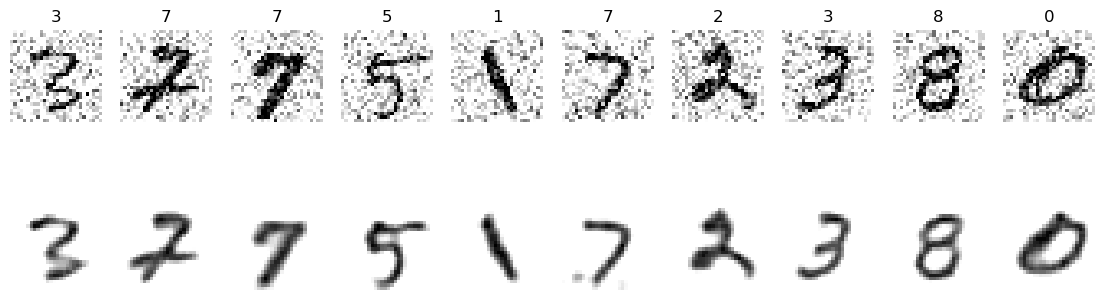

In [107]:
X_test_noisy_pred = autoencoder.predict(X_test_noisy).reshape(-1, 28, 28)

n = 10

random_indexes = numpy.random.choice(X_test.shape[0],
                                     replace=False,
                                     size=n)

_, ax = plt.subplots(2, n, figsize=(n * 1.4, 4))
for (ax_top, ax_bottom), random_index in zip(ax.T, random_indexes):
    # L'image originale en haut
    ax_top.set_title(str(y_test[random_index]))
    ax_top.imshow(X_test_noisy[random_index].reshape(28, 28), cmap="gray_r")
    ax_top.axis("off")

    # L'image reconstruite en bas
    ax_bottom.imshow(X_test_noisy_pred[random_index], cmap="gray_r")
    ax_bottom.axis("off")
plt.show()

## Sur des images non-bruitées

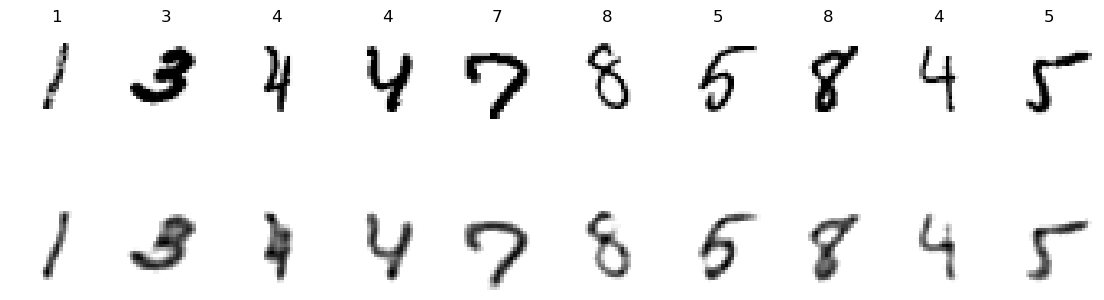

In [108]:
X_test_pred = autoencoder.predict(X_test).reshape(-1, 28, 28)

n = 10

random_indexes = numpy.random.choice(X_test.shape[0],
                                     replace=False,
                                     size=n)

_, ax = plt.subplots(2, n, figsize=(n * 1.4, 4))
for (ax_top, ax_bottom), random_index in zip(ax.T, random_indexes):
    # L'image originale en haut
    ax_top.set_title(str(y_test[random_index]))
    ax_top.imshow(X_test[random_index].reshape(28, 28), cmap="gray_r")
    ax_top.axis("off")

    # L'image reconstruite en bas
    ax_bottom.imshow(X_test_pred[random_index], cmap="gray_r")
    ax_bottom.axis("off")
plt.show()